##### Copyright 2024 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API - read a PDF

This notebook demonstrates how you can convert a PDF file so that it can be read by the Gemini API.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/PDF_Files.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Setup

In [2]:
!pip install -Uq google-generativeai

In [3]:
import google.generativeai as genai


import pathlib
import tqdm
import os

In [4]:
from google.colab import userdata
genai.configure(api_key=userdata.get("GOOGLE_API_KEY"))

Install the PDF processing tools. You don't need these to use the api, it's just used to display a screenshot of a page.

In [5]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


## Download and inspect the PDF

This textbook is from OpenStax, it's License is Commons Attribution License v4.0. More detrails are [available on the site](https://openstax.org/details/books/university-physics-volume-2).

In [6]:
import pathlib

In [7]:
if not pathlib.Path('test.pdf').exists():
  !curl -o test.pdf https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf

Look at one of the pages:

In [17]:
!pdftoppm test.pdf -f 1 -l 1 page-image -jpeg
!ls

page-image-01.jpg  sample_data	test.pdf


In [9]:
import PIL.Image

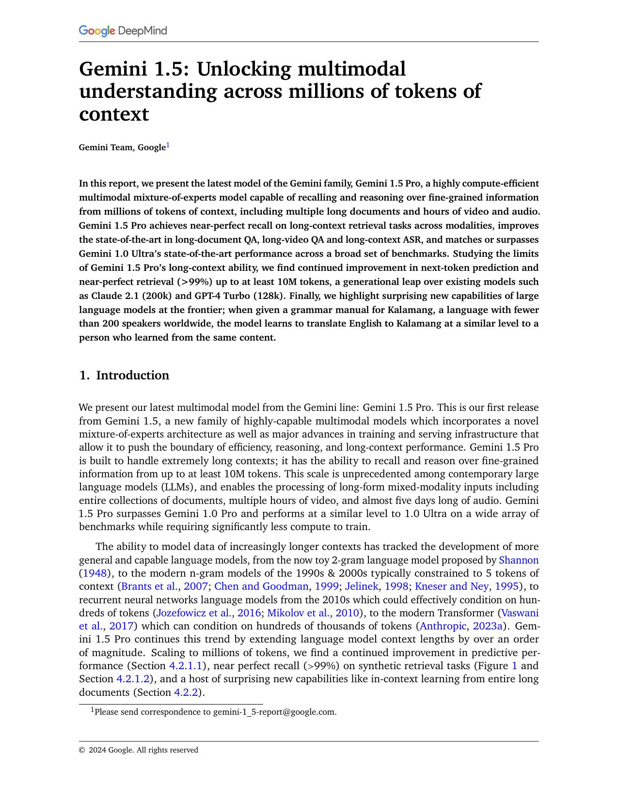

In [10]:
img = PIL.Image.open(f"page-image-01.jpg")
img.thumbnail([800, 800])
img

## Upload the file to the API

In [11]:
file_ref = genai.upload_file('test.pdf')

## Try it out

In [12]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash')

The pages of the PDF file are each passed to the model as a screenshot of the page plus the text extracted by OCR.

In [13]:
model.count_tokens([file_ref, "Can you summarize this file for me?"])

total_tokens: 8

In [14]:
response = model.generate_content(
    [file_ref, '\n\nCan you summarize this file as a bulleted list?']
)

In [15]:
from IPython.display import Markdown
Markdown(response.text)

Sure, here is a summary of the file as a bulleted list.

* This paper introduces Gemini 1.5 Pro, the latest model in the Gemini family of multi-modal, mixture-of-experts models.
* Gemini 1.5 Pro is capable of recalling and reasoning over fine-grained information from millions of tokens of context, including multiple long documents, hours of video, and audio.
* It improves the state-of-the-art on long-context retrieval tasks, long-document QA, long-video QA, and long-context ASR.
* It pushes the boundary of efficiency and performance compared to Gemini 1.0 Pro and matches or surpasses the capabilities of Gemini 1.0 Ultra.
* The paper highlights the novel long-context capabilities of Gemini 1.5 Pro, including its ability to:
    * Achieve near-perfect "needle" recall (>99%) up to 10M tokens in all modalities (text, video, and audio).
    * Learn to translate English to Kalamang, a language with fewer than 200 speakers, from a single grammar manual.
    * Reason and answer questions about long documents and videos.
* The paper also discusses the model architecture, training infrastructure, and dataset.
* It presents detailed evaluations of the model's long-context capabilities, including perplexity over long sequences, needle-in-a-haystack retrieval, and realistic evaluations for multimodal long-context tasks.
* The paper also explores the model's core capabilities, including its performance on math, science, reasoning, coding, multilinguality, instruction following, vision, and audio tasks.
* The paper discusses the model's responsible deployment, including impact assessment, model mitigation efforts, and safety evaluations.
* It concludes with a discussion of the challenges and opportunities for future research on long-context models.
* The paper includes a model card and appendix with additional details about the model, training, evaluation, and prompt engineering.